# 📊 Sales Summary Using SQLite in Python
This notebook creates a SQLite database, inserts sales data, performs SQL queries, and visualizes the result using a bar chart.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

### 🔌 Connect to SQLite and Create Sales Table

In [2]:

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    category TEXT,
    date TEXT,
    quantity INTEGER,
    price REAL
)
''')


### 📝 Insert Sample Sales Data (with date and category)

In [3]:

sample_data = [
    ('Laptop', 'Electronics', '2024-01-01', 5, 750.0),
    ('Smartphone', 'Electronics', '2024-01-05', 10, 400.0),
    ('Headphones', 'Accessories', '2024-02-10', 15, 50.0),
    ('Monitor', 'Electronics', '2024-03-15', 7, 150.0),
    ('Keyboard', 'Accessories', '2024-04-01', 20, 30.0),
    ('Laptop', 'Electronics', '2024-04-15', 3, 750.0),
    ('Smartphone', 'Electronics', '2024-05-01', 5, 400.0),
    ('Monitor', 'Electronics', '2024-05-10', 2, 150.0),
]

cursor.executemany("INSERT INTO sales (product, category, date, quantity, price) VALUES (?, ?, ?, ?, ?)", sample_data)
conn.commit()


### 📊 SQL Query: Total Quantity and Revenue Per Product

In [4]:

query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

df = pd.read_sql_query(query, conn)
print(df)


      product  total_qty  revenue
0  Headphones         15    750.0
1    Keyboard         20    600.0
2      Laptop          8   6000.0
3     Monitor          9   1350.0
4  Smartphone         15   6000.0


### 📈 Plot Revenue by Product

<Figure size 800x500 with 0 Axes>

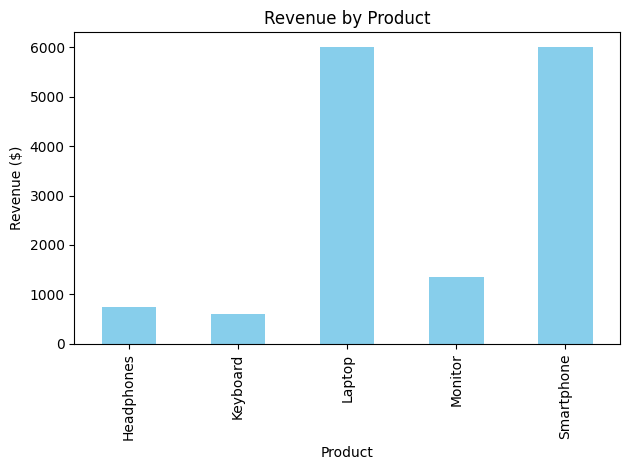

In [5]:

plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title('Revenue by Product')
plt.ylabel('Revenue ($)')
plt.xlabel('Product')
plt.tight_layout()
plt.savefig('sales_chart.png')
plt.show()


### 📅 Advanced SQL: Monthly Revenue

     month  monthly_revenue
0  2024-01           7750.0
1  2024-02            750.0
2  2024-03           1050.0
3  2024-04           2850.0
4  2024-05           2300.0


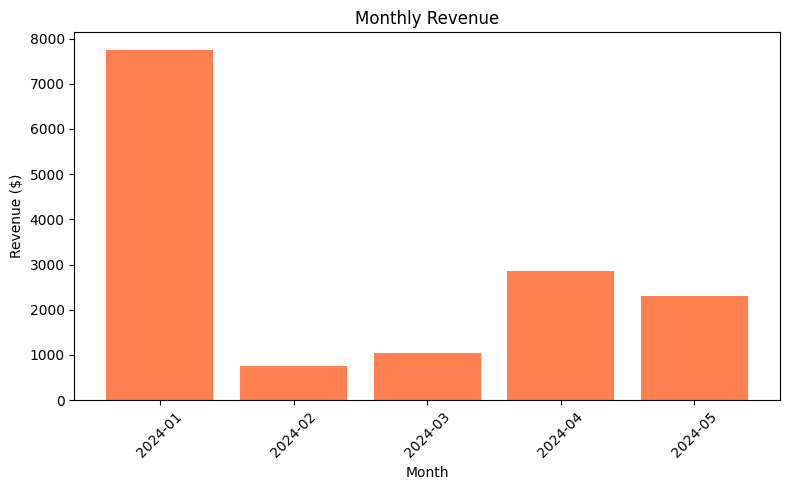

In [6]:

query_monthly = '''
SELECT
    strftime('%Y-%m', date) AS month,
    SUM(quantity * price) AS monthly_revenue
FROM sales
GROUP BY month
ORDER BY month
'''

df_month = pd.read_sql_query(query_monthly, conn)
print(df_month)

plt.figure(figsize=(8, 5))
plt.bar(df_month['month'], df_month['monthly_revenue'], color='coral')
plt.title('Monthly Revenue')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### ✅ Close the connection

In [7]:
conn.close()